# Portafolio Finanzas

Este documento presenta un código de como obtener información usando Yahoo finance (https://finance.yahoo.com), utilizando los estudios de Markowitz.

## Introducción

In [1]:
# Importamos las librerias que se usarán
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Tenemos que definir los tickers, aquí es un ejemplo de como obtener información de una compañia, en este caso NVIDIA Corporation (NVDA), recordar que necesitas conocer las abreviaruras para cada una de las compañias a evaluar todas conformadas por letras mayúsculas como se oberva a continuación.

In [2]:
# Definir el ticker de NVIDIA
ticker = 'NVDA'

# Definir el rango de fechas (último año)
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(years=1)

# Descargar los datos históricos
nvidia_data = yf.download(ticker, start=start_date, end=end_date)

# Mostrar los datos
print(nvidia_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-07-19  47.464001  47.818001  46.742001  47.077000  47.062904  427502000
2023-07-20  46.507000  47.087002  45.062000  45.520000  45.506374  537865000
2023-07-21  45.787998  45.866001  44.099998  44.308998  44.295734  963769000
2023-07-24  44.730999  45.109001  44.040001  44.612000  44.598652  382516000
2023-07-25  44.941002  46.182999  44.923000  45.679001  45.665329  348081000


Ahora veamos para otras compñías en este caso usarmeos tanto NVIDIA como The Coca-Cola Company (KO) y Intel Corporation (INTC).



In [4]:
# Definimos los tickers de las acciones
tickers = ['NVDA','KO','INTC']

# Definir el rango de fechas
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Descragar el histórico de precios
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close'] # Estamos viendo el cierre
data.head()

# Calcular los retornos
returns = data.pct_change().dropna()
returns.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,INTC,KO,NVDA
Date,,,
2024-01-22,0.001454,-0.004346,0.002740
2024-01-23,0.013895,0.004700,0.003671
2024-01-24,0.004091,-0.015706,0.024869
2024-01-25,0.009371,0.004244,0.004156
2024-01-26,-0.119072,0.003550,-0.009510


Así mismo podemos realizar gráficas utilizando estos valores.

(array([ 1.,  1.,  1.,  2.,  6., 25., 48., 34.,  5.,  1.]),
 array([-0.11907165, -0.10101207, -0.0829525 , -0.06489293, -0.04683335,
        -0.02877378, -0.01071421,  0.00734537,  0.02540494,  0.04346451,
         0.06152408]),
 <BarContainer object of 10 artists>)

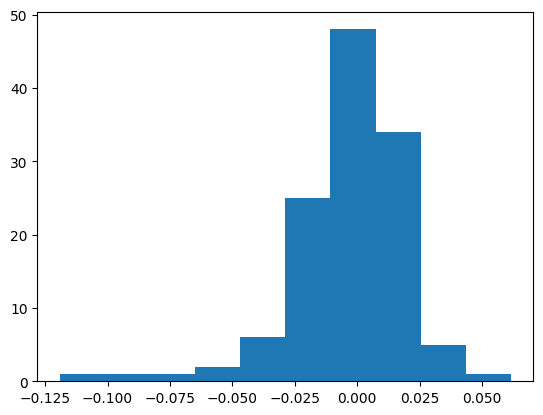

In [5]:
# Histograma de INTC
plt.hist(returns['INTC'])

## Media y Varianza

Grafiquemos la media de los regresos que obtenemos y la varianza de etos, son datos importantes para definir el riesgo de una acción.

[*********************100%%**********************]  3 of 3 completed


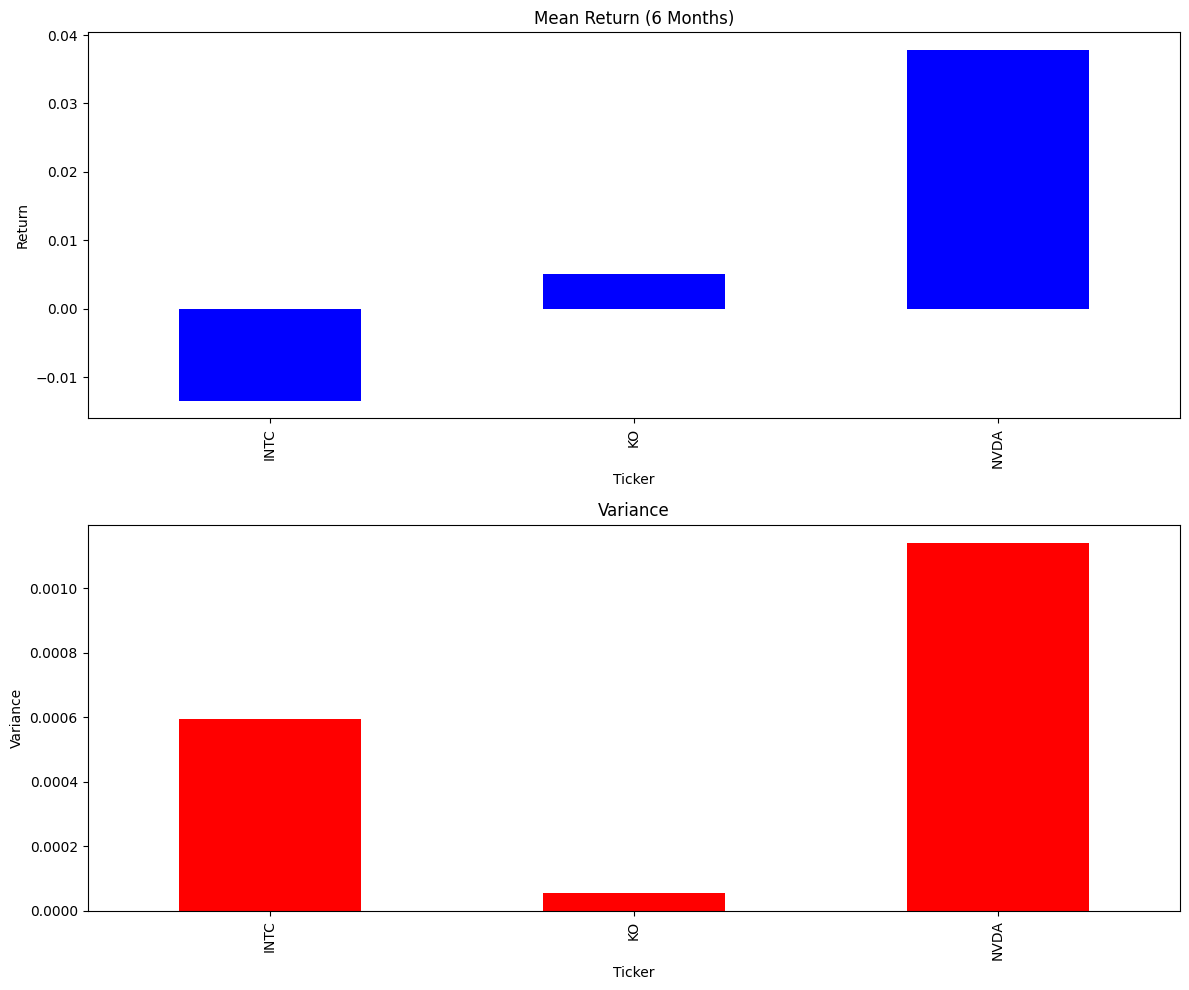

In [6]:
# Definir los tickers de las acciones
tickers = ['NVDA', 'KO', 'INTC']

# Definir el rango de fechas
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Descargar el histórico de precios
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcular los retornos
returns = data.pct_change().dropna()

# Calcular el retorno promedio de 6 meses y la varianza
mean_returns = returns.mean() * 6  # multiplicar por 6 para anualizar el retorno promedio mensual
variance = returns.var()

# Crear un DataFrame con los resultados
results = pd.DataFrame({'Mean Return (6M)': mean_returns, 'Variance': variance})

# Graficar los resultados
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de retorno promedio de 6 meses
results['Mean Return (6M)'].plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Mean Return (6 Months)')
ax[0].set_ylabel('Return')
ax[0].set_xlabel('Ticker')

# Gráfico de varianza
results['Variance'].plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Variance')
ax[1].set_ylabel('Variance')
ax[1].set_xlabel('Ticker')

plt.tight_layout()
plt.show()

<ipython-input-7-a69bc5a83072>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(ticker, (results['Variance'][i], results['Mean Return (6M)'][i]))


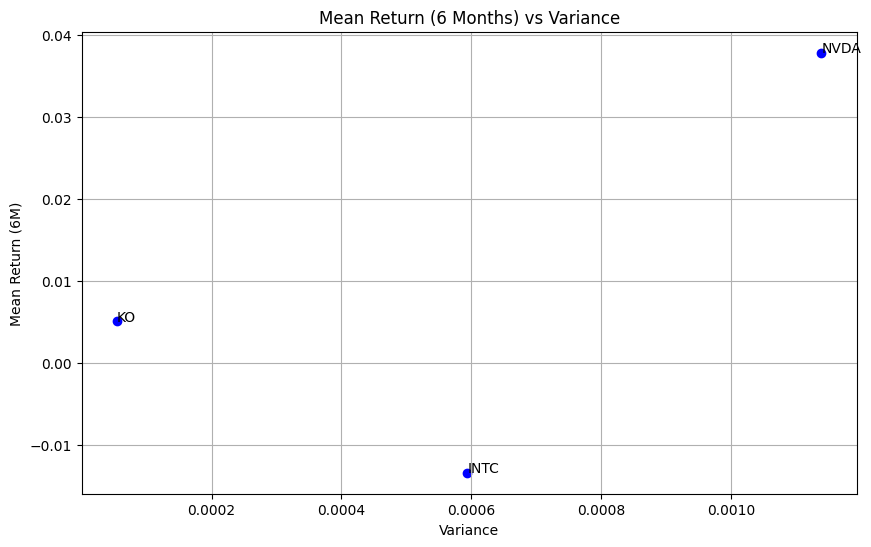

In [7]:
# Crear un DataFrame con los resultados
results = pd.DataFrame({'Mean Return (6M)': mean_returns, 'Variance': variance})

# Graficar los resultados en un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results['Variance'], results['Mean Return (6M)'], color='blue')

# Añadir etiquetas para cada punto
for i, ticker in enumerate(results.index):
    plt.annotate(ticker, (results['Variance'][i], results['Mean Return (6M)'][i]))

plt.title('Mean Return (6 Months) vs Variance')
plt.xlabel('Variance')
plt.ylabel('Mean Return (6M)')
plt.grid(True)
plt.show()

La matriz de covarianza es para observar la relación entre las subidas y bajadas de las acciones a las compaías a invertir, no es recomendable que tengas muchas relación entre ellas ya que por obvias razon si en una se pierde seguramente en otra será igual, tenemos que buscar que no haya correlación en la mayoría de compañias en las que se invierte, buscar inversión en diferentes sectores (teconología, bancos, farmaceutica, aseguradoras, recursos naturales, etc) para que si perdemos en un lado haya baja probabilidad que se pueda relacionar la pérdid en otra.

In [9]:
# Calcular la matriz de covarianzas
cov_matrix = returns.cov()

# Mostrar la matriz de covarianzas
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
Ticker      INTC        KO      NVDA
Ticker                              
INTC    0.000594  0.000014  0.000097
KO      0.000014  0.000054 -0.000080
NVDA    0.000097 -0.000080  0.001139


## Gráfica de Portafolios

Ahora veamos con toda la información las diferentes combinaciones de nuestras acciones, lo que obtendremos será una distribución de pesos (Weight) los cuales serán los porcentajes de nuestra inversión total.

[*********************100%%**********************]  3 of 3 completed
<ipython-input-10-f3a36b58c184>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=200, label='Max Sharpe Ratio')
<ipython-input-10-f3a36b58c184>:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_risk_port[1], min_risk_port[0], marker='*', color='b', s=200, label='Min Risk')


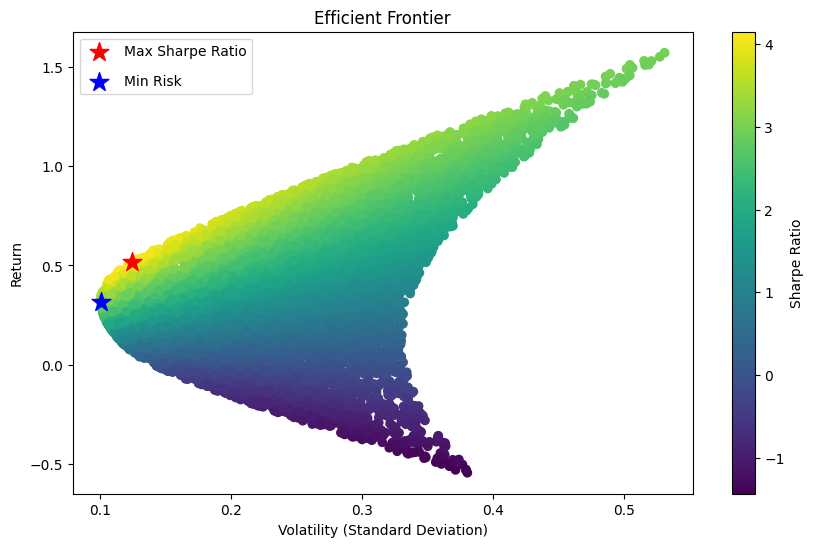

Portafolio con el mayor Sharpe Ratio
Return                   0.517581
Standard Deviation       0.124666
Sharpe Ratio             4.151753
Index                 3939.000000
Weight_NVDA              0.003346
Weight_KO                0.773427
Weight_INTC              0.223227
Name: 3939, dtype: float64

Portafolio con el menor riesgo
Return                   0.317275
Standard Deviation       0.100747
Sharpe Ratio             3.149234
Index                 4042.000000
Weight_NVDA              0.034168
Weight_KO                0.870794
Weight_INTC              0.095038
Name: 4042, dtype: float64


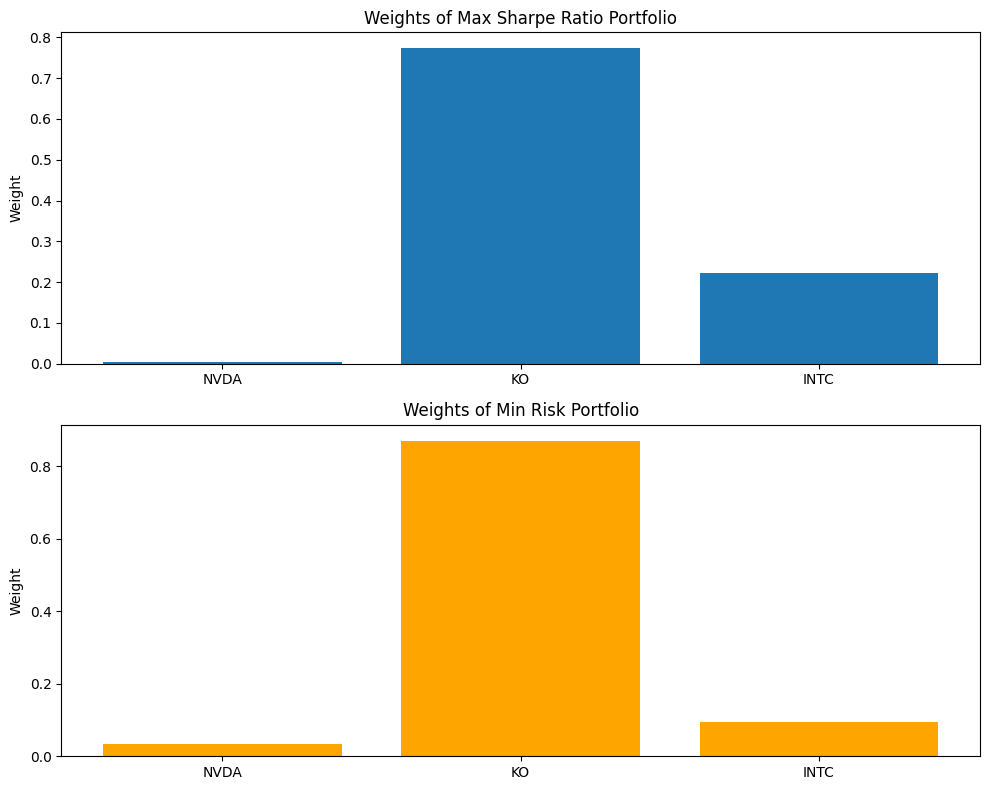

In [10]:
# Definir los tickers de las acciones
tickers = ['NVDA', 'KO', 'INTC']

# Definir el rango de fechas
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Descargar el histórico de precios
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcular los retornos
returns = data.pct_change().dropna()

# Calcular el retorno promedio y la matriz de covarianzas
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Número de portafolios a simular
num_portfolios = 10000
results = np.zeros((4 + len(tickers), num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.sum(weights * mean_returns) * 252  # anualizado
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # anualizado

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = results[0, i] / results[1, i]  # Sharpe ratio
    results[3, i] = i  # Index for retrieval

    for j in range(len(weights)):
        results[4 + j, i] = weights[j]

# Convertir los resultados a un DataFrame
columns = ['Return', 'Standard Deviation', 'Sharpe Ratio', 'Index'] + [f'Weight_{ticker}' for ticker in tickers]
results_frame = pd.DataFrame(results.T, columns=columns)

# Encontrar el portafolio con el mayor Sharpe ratio
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]
# Encontrar el portafolio con el menor riesgo
min_risk_port = results_frame.loc[results_frame['Standard Deviation'].idxmin()]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results_frame['Standard Deviation'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=200, label='Max Sharpe Ratio')
plt.scatter(min_risk_port[1], min_risk_port[0], marker='*', color='b', s=200, label='Min Risk')

# Añadir etiquetas y título
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend(labelspacing=1.2)
plt.show()

# Mostrar los portafolios óptimos
print("Portafolio con el mayor Sharpe Ratio")
print(max_sharpe_port)

print("\nPortafolio con el menor riesgo")
print(min_risk_port)

# Graficar los pesos de los portafolios óptimos
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Pesos del portafolio con el mayor Sharpe ratio
ax[0].bar(tickers, max_sharpe_port[4:4 + len(tickers)])
ax[0].set_title('Weights of Max Sharpe Ratio Portfolio')
ax[0].set_ylabel('Weight')

# Pesos del portafolio con el menor riesgo
ax[1].bar(tickers, min_risk_port[4:4 + len(tickers)], color='orange')
ax[1].set_title('Weights of Min Risk Portfolio')
ax[1].set_ylabel('Weight')

plt.tight_layout()
plt.show()

Es importante ver que ya recae la decisión de cada quien en como se invierte el dinero, aquí sería obsevar que tanto estas dispuesto a arriesgar en una inverisón en acciones y que tanto quieres ganar, busca los mejores rendimientos dependiendo de la situación de cada uno, si notamos en la gráfica se sigue lo que se ocnoce como la forntera de eficiencia en la parte superior es donde la eficiencia es ayor a cada riesgo, por último evitar inveritr en criptomonedas ya que no siguen variaciones predecibles y solo invertir en compñias de sectores que uno conozca sobre su negocio ya que se necesita una investigación previa para tener mejhores resultados, así como observar los tiempos en los que se esta observando la variación de las acciones.